Lab 5 | Discrete cosine transformation (DCT)

Made by Dmitriy Sokolov, 3530901/00203

Firstly, prepare the environment

In [1]:
from labs.install_deps import require_think_dsp

require_think_dsp()

thinkdsp.py successfully download


-----
### Part 1

Measure time/difference between `analyze2` ($O(n^2 )$) and `analyze1` ($O(n^3 )$) execution speed

In [2]:
import numpy as np

PI2 = np.pi * 2

def analyze1(ys, fs, ts):
    args = np.outer(ts, fs)
    M = np.cos(PI2 * args)
    amps = np.linalg.solve(M, ys)
    return amps

In [3]:
def analyze2(ys, fs, ts):
    args = np.outer(ts, fs)
    M = np.cos(PI2 * args)
    amps = M.dot(ys) / 2
    return amps

In [44]:
import scipy.fftpack

def scipy_dct(ys, freqs, ts):
    return scipy.fftpack.dct(ys, type=3)

We will measure this funs on uncorrelated noise

In [45]:
from labs.thinkdsp import UncorrelatedGaussianNoise

signal = UncorrelatedGaussianNoise()
noise = signal.make_wave(duration=1.0, framerate=16384) # sqrt(16384) = 128 = 2^7
noise.ys.shape

(16384,)

In [60]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
from labs.thinkdsp import decorate

loglog = dict(xscale='log', yscale='log')

def plot_bests(ns, bests, color='b'):
    plt.plot(ns, bests, color=color)
    decorate(**loglog)

    x = np.log(ns)
    y = np.log(bests)
    t = linregress(x,y)
    slope = t[0]

    return slope

In [6]:
def measure_fun(ns, func):
    results = []
    for N in ns:
        print(N)
        ts = (0.5 + np.arange(N)) / N
        freqs = (0.5 + np.arange(N)) / 2
        ys = noise.ys[:N]
        result = %timeit -r1 -o func(ys, freqs, ts)
        results.append(result)

    bests = [result.best for result in results]
    return bests

tests frequencies:

In [7]:
ns = 2 ** np.arange(6, 13)
ns

array([  64,  128,  256,  512, 1024, 2048, 4096], dtype=int32)

In [8]:
bests1 = measure_fun(ns, analyze1)
bests2 = measure_fun(ns, analyze2)

64
133 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10000 loops each)
128
438 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)
256
1.64 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)
512
6.57 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
1024
30.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
2048
184 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
4096
1.03 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
64
43.6 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10000 loops each)
128
143 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10000 loops each)
256
527 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)
512
3.02 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
1024
12.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
2048
48.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
4096
192 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop e

In [53]:
bests3 = measure_fun(ns, scipy_dct)

64
10.2 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100000 loops each)
128
10.8 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100000 loops each)
256
11.4 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100000 loops each)
512
9.77 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100000 loops each)
1024
10.6 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100000 loops each)
2048
15.4 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100000 loops each)
4096
28 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10000 loops each)


analyze1 vs analyze2 vs spicy_dst comparison in plot:

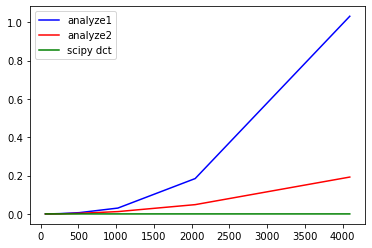

In [58]:
plt.plot(ns, bests1, label='analyze1', color='b')
plt.plot(ns, bests2, label='analyze2', color='r')
plt.plot(ns, bests3, label='scipy dct', color='g')
plt.legend()

2.157405289898639

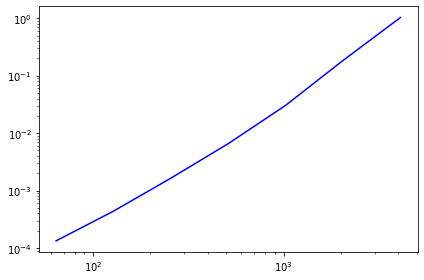

In [62]:
plot_bests(ns, bests1, 'b')

2.059092413788214

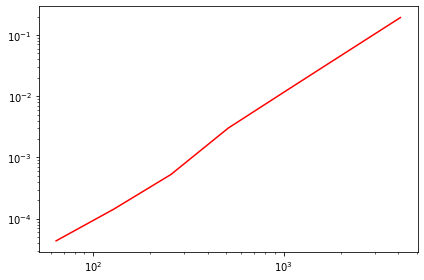

In [64]:
plot_bests(ns, bests2, 'r')

0.18972195936225156

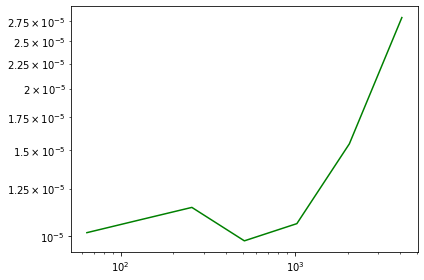

In [65]:
plot_bests(ns, bests3, 'g')

Expected, that slope of analyze1 and analyze2 would be near with 3 and 2. But they are both close to 2.
But one of things expected is analyze2 faster, than analyze1.
And scipy sct is faster than others.

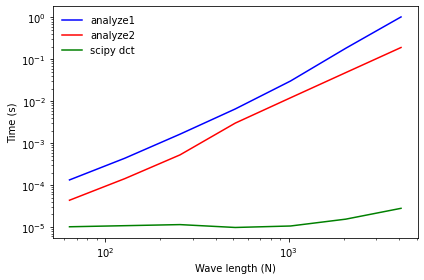

In [66]:
plt.plot(ns, bests1, label='analyze1', color='b')
plt.plot(ns, bests2, label='analyze2', color='r')
plt.plot(ns, bests3, label='scipy dct', color='g')
decorate(xlabel='Wave length (N)', ylabel='Time (s)', **loglog)